#Assignment 1:
test if the distribution of ages is the same for 

1) male and femal riders

2) day and night riders

use 3 tests: KS, Pearson's, Spearman's

# Part I :Test if the distribution of ages is the same for male and female riders

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('201502-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [3]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

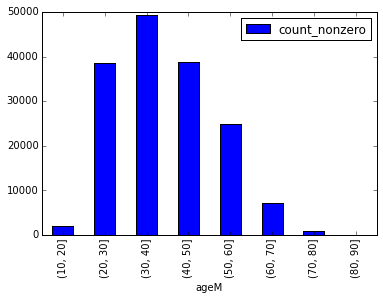

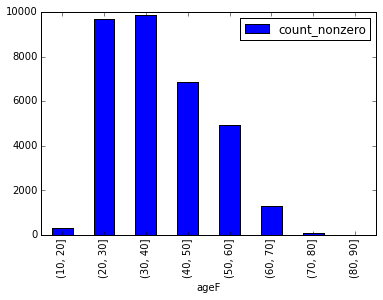

In [4]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.002160
(20, 30]       0.052312
(30, 40]       0.044676
(40, 50]       0.012573
(50, 60]       0.008436
(60, 70]       0.003543
(70, 80]       0.000207
(80, 90]       0.000000


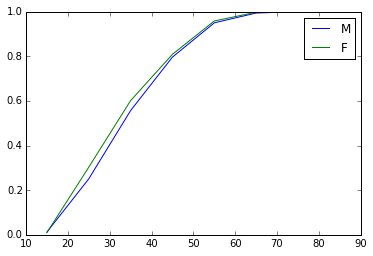

In [5]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

## KS Test

In [6]:
ks = scipy.stats.ks_2samp(df.ageM.dropna(), df.ageF.dropna())
print ks

(0.062122453007178557, 1.4566899787430881e-92)


### Comment
The p-value is less than 0.05(the significance level), hence we REJECT the null hypothesis that the two samples of age for male and female riders come from the same parent distribution.

## Pearson's Test

In [7]:
print len(df.ageM.dropna())
print len(df.ageF.dropna())

161561
33064


In [8]:
male = np.random.choice(df.ageM.dropna(), len(df.ageF.dropna()), replace = False)
pearson = scipy.stats.pearsonr(male, df.ageF.dropna())
print pearson

(0.0014845232612495714, 0.78721536523000224)


### Comment
The p-value is larger than 0.05(the significance level), hence we FAIL to reject the null hypothesis that the two samples of age for male and female riders are correlated.

## Spearman's Test

In [9]:
spearman = scipy.stats.spearmanr(male, df.ageF.dropna())
print spearman

(0.001073926569557815, 0.84518141854302353)


### Comment
The p-value is larger than 0.05(the significance level), hence we FAIL to reject the null hypothesis that the two samples of age for male and female riders are correlated.

# Part II :Test if the distribution of ages is the same for day and night riders

In [10]:
df['mystarttime'] = pd.to_datetime(df['starttime'])
df['hour'] = df['mystarttime'].dt.hour

In [11]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber')&((df['hour'] >= 6) & (df['hour']<=19))]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber')&((df['hour'] > 19) | (df['hour']<6))]

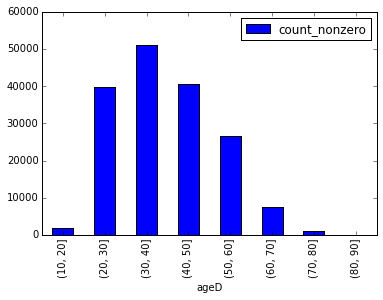

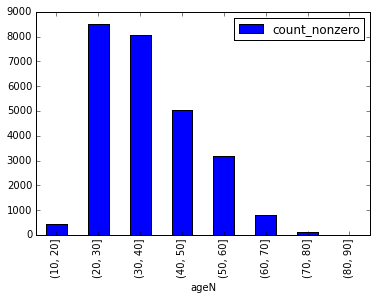

In [12]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.006009
(20, 30]       0.094377
(30, 40]       0.097872
(40, 50]       0.050475
(50, 60]       0.015369
(60, 70]       0.001515
(70, 80]       0.000146
(80, 90]       0.000000


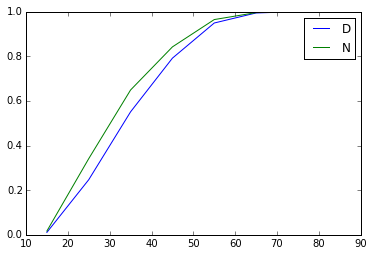

In [13]:
csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.legend()

## KS Test

In [14]:
ks1 = scipy.stats.ks_2samp(df.ageD.dropna(), df.ageN.dropna())
print ks1

(0.11746090623447658, 9.8858908581033048e-273)


### Comment
The p-value is less than 0.05(the significance level), hence we REJECT the null hypothesis that the two samples of ages for day and night riders come from the same parent distribution.

## Pearson's Test

In [15]:
print len(df.ageD.dropna())
print len(df.ageN.dropna())

168446
26217


In [16]:
male1 = np.random.choice(df.ageD.dropna(), len(df.ageN.dropna()), replace = False)
pearson1 = scipy.stats.pearsonr(male1, df.ageN.dropna())
print pearson1

(0.00042251665643998956, 0.94545988196739739)


### Comment
The p-value is larger than 0.05(the significance level), hence we FAIL to reject the null hypothesis that the two samples of age for day and night riders are correlated.

## Spearman's Test

In [17]:
spearman1 = scipy.stats.spearmanr(male1, df.ageN.dropna())
print spearman1

(0.0031884232073509954, 0.60568994851556779)


### Comment
The p-value is larger than 0.05(the significance level), hence we FAIL to reject the null hypothesis that the two samples of age for day and night riders are correlated.